# Predicting-Obesity-Rate-Based-on-Food-Atlas

## 2. EDA and Modelling

## Contents

- [Imports](#Imports)
- [EDA](#EDA)
    - [EDA on the Merged Dataset](#EDA-on-the-merged-dataset)
- [Preprocessing](#Preprocessing)
    - [Rename Columns](#Rename-Columns)
    - [Feature Selection and Collinearity](#Feature-Selection-and-Collinearity)
    - [Pairplot](#Pairplot)
- [Modelling](#Modelling)
    - [Train/Test Split](#Train/Test-Split)
    - [Regression Metrics Function](#Regression-Metrics-Function)
    - [Baseline Model](#Baseline-Model)
    - [Linear Regression with all features](#Linear-Regression-with-all-features)
    - [Linear Regression with correlated features](#Linear-Regression-with-correlated-features)
    - [Regularized Linear Regression](#Regularized-Linear-Regression)
        - [Scale](#Scale)
        - [Lasso](#Lasso)
    - [PCA](#PCA)
- [Predictions](#Predictions)
    -[Table of Results](#Table-of-results)
- [Conclusions and Limitations](#Conclusions-and-Limitations)

## Imports 

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

[Data Dictionary ](https://www.ers.usda.gov/webdocs/DataFiles/80526/archived_documentation_August2015.pdf?v=0)

# EDA

# Cleaning the Merged Dataset

We removed any columns that included the year past 2013 since the target for this analysis is 2013. 

In [2]:
df = pd.read_csv('../Data/df.csv')

In [3]:
df.columns

Index(['FIPS', 'FIPS.1', 'State', 'County', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'RECFAC14', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_N

In [4]:
#predicting the 13 obesity rate, drop year after
col_list = [col for col in df.columns if '15' in col]
df.drop(col_list, axis=1, inplace=True)

In [5]:
col_list_2 = [col for col in df.columns if '14' in col]
df.drop(col_list_2, axis=1, inplace=True)

In [6]:
col_list_3 = [col for col in df.columns if '16' in col]
df.drop(col_list_3, axis=1, inplace=True)

'PCT_LACCESS_POP10' is the percent access to stores 

## Preprocessing

#### Rename Columns

In [7]:
df.columns

Index(['FIPS', 'FIPS.1', 'State', 'County', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'LACCESS_POP10', 'PCT_LACCESS_POP10', 'LACCESS_LOWI10',
       'PCT_LACCESS_LOWI10', 'LACCESS_HHNV10', 'PCT_LACCESS_HHNV10',
       'LACCESS_CHILD10', 'PCT_LACCESS_CHILD10', 'LACCESS_SENIORS10',
       'PCT_LACCESS_SENIORS10', 'GROC09', 'GROCPTH09', 'SUPERC09',
       'SUPERCPTH09', 'CONVS09', 'CONVSPTH09', 'SPECS09', 'SPECSPTH09',
       'SNAPS12', 'SNAPSPTH12', 'WICS08', 'WICS12', 'PCH_WICS_08_12',
       'WICSPTH08', 'WICSPTH12', 'PCH_WICSPTH_08_12', 'GHVEG_FARMS07',
       'GHVEG_FARMS12', 'CSA07', 'VEG_FARMS07', 'VEG_FARMS12', 'FMRKT09',
       'PCT_LOCLFARM07', 'PCT_LOCLFARM12'],
      dtype='object')

In [8]:
#df.rename(columns={'RECFAC09': 'number of fitness facilities', 'GROC09': 'Count of grocery stores', 'SUPERC':'Number of supercenters'
                  #, 'SNAPS12':'SNAP-Authorized stores', 'WICS12': 'WIC-authorized stores', 'LACCESS_POP10': 'Count of population- low access to store'})



### Feature Selection

- which features should be included in the model?
- Feature multicollinearity

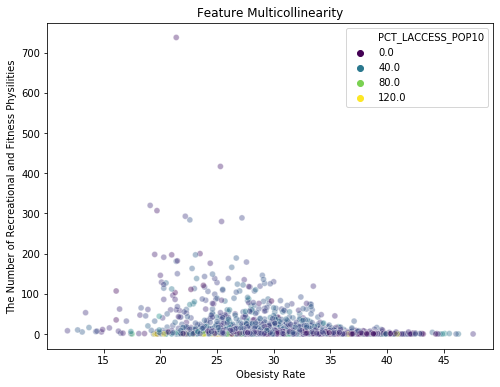

In [9]:
ax = plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df['PCT_OBESE_ADULTS13'], y=df['RECFAC09'], hue=df['PCT_LACCESS_POP10'],
                 cmap='viridis', alpha=.4, legend='brief', palette='viridis');
plt.title("Feature Multicollinearity");
plt.xlabel("Obesisty Rate");
plt.ylabel("The Number of Recreational and Fitness Physilities");

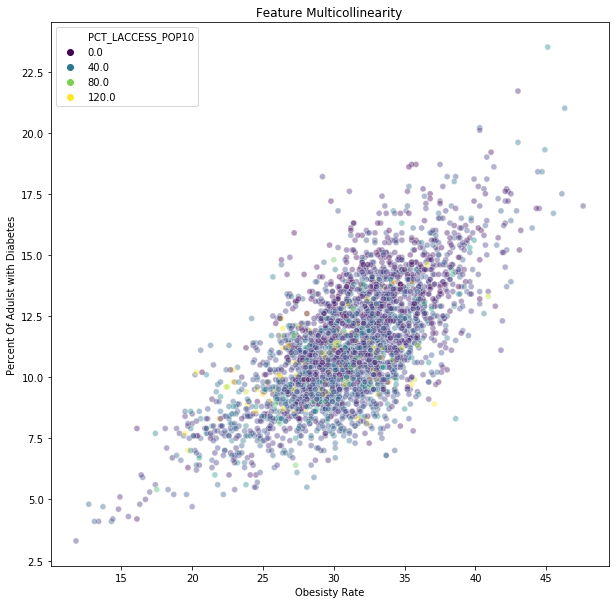

In [10]:
ax = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=df['PCT_OBESE_ADULTS13'], y=df['PCT_DIABETES_ADULTS13'], hue=df['PCT_LACCESS_POP10'],
                 cmap='viridis', alpha=.4, legend='brief', palette='viridis');
plt.title("Feature Multicollinearity");
plt.xlabel("Obesisty Rate");
plt.ylabel("Percent Of Adulst with Diabetes");

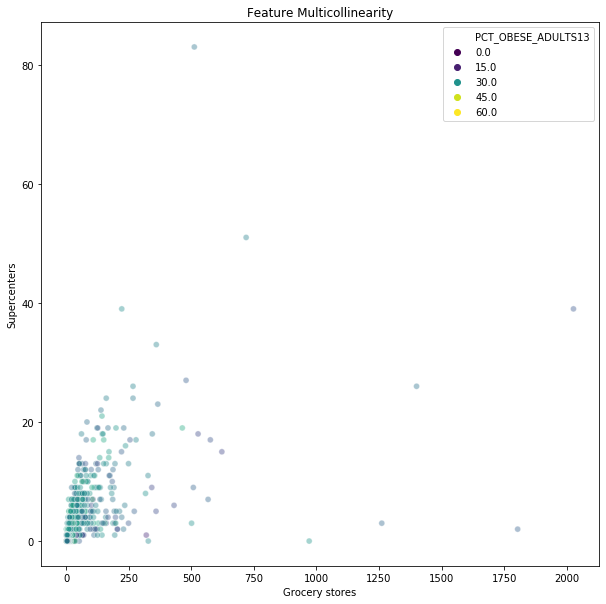

In [11]:
ax = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=df['GROC09'], y=df['SUPERC09'], hue=df['PCT_OBESE_ADULTS13'],
                 cmap='viridis', alpha=.4, legend='brief', palette='viridis');
plt.title("Feature Multicollinearity");
plt.xlabel("Grocery stores");
plt.ylabel("Supercenters");

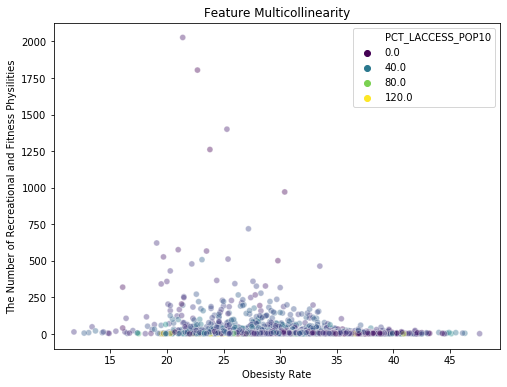

In [12]:
ax = plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df['PCT_OBESE_ADULTS13'], y=df['GROC09'], hue=df['PCT_LACCESS_POP10'],
                 cmap='viridis', alpha=.4, legend='brief', palette='viridis');
plt.title("Feature Multicollinearity");
plt.xlabel("Obesisty Rate");
plt.ylabel("The Number of Recreational and Fitness Physilities");

In [13]:
correlation = df.corr()[['PCT_OBESE_ADULTS13']].head(10)
sorted_coefs = abs(correlation).sort_values('PCT_OBESE_ADULTS13', ascending = False)
    
strong_corr = sorted_coefs[(sorted_coefs['PCT_OBESE_ADULTS13'] > .1)]

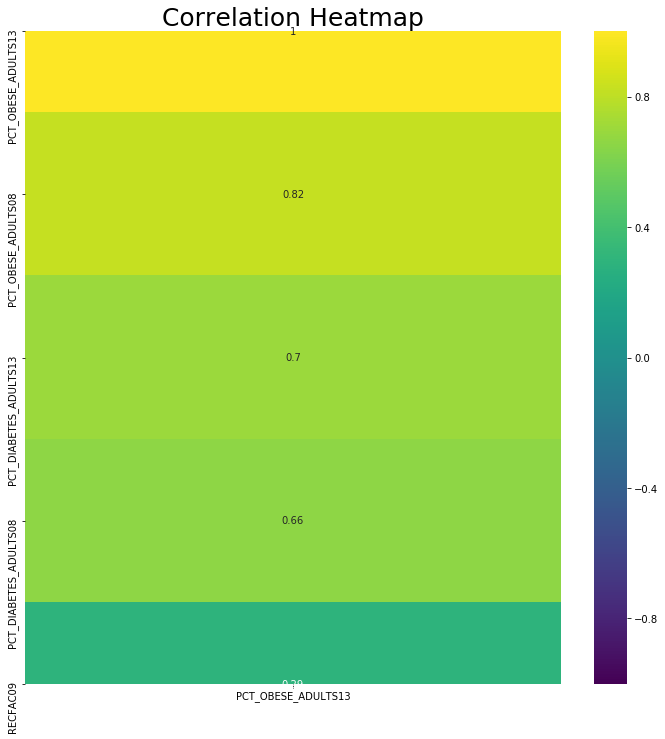

In [14]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(strong_corr.head(5),cmap= 'viridis',
           vmin=-1,
           vmax=1,
           annot=True)
plt.title('Correlation Heatmap', fontsize = 25);

RECFAC- is the number of Recreation & fitness facilities, 2009

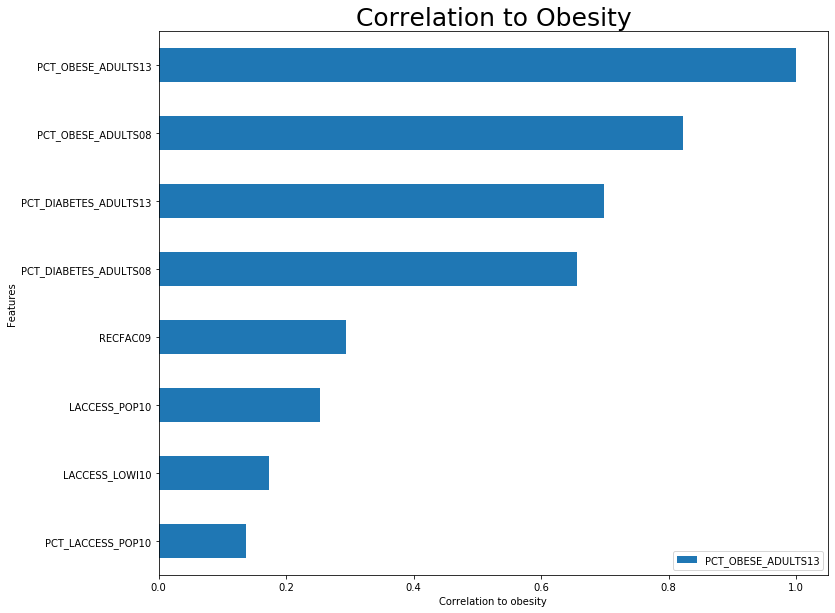

In [15]:
ax = strong_corr.head(15).plot(kind='barh', figsize = (12,10))
ax.set(ylabel='Features', xlabel='Correlation to obesity') 
ax.invert_yaxis()
plt.title('Correlation to Obesity', fontsize = 25);

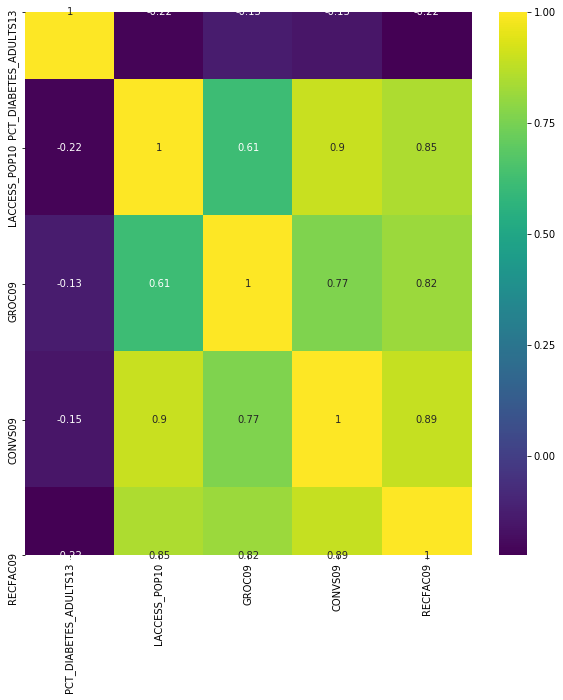

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df[[
    'PCT_DIABETES_ADULTS13', 'LACCESS_POP10','GROC09',
                 'CONVS09', 'RECFAC09']]\
.corr(),
            annot=True, cmap='viridis');

In [17]:
corr=df.iloc[:,:-1].corr()

In [18]:
# check for correlation 
corr = df.corr()
corr['PCT_OBESE_ADULTS13'].sort_values(ascending=False).head(10)

PCT_OBESE_ADULTS13       1.000000
PCT_OBESE_ADULTS08       0.821918
PCT_DIABETES_ADULTS13    0.698009
PCT_DIABETES_ADULTS08    0.656896
PCT_LACCESS_HHNV10       0.402890
SNAPSPTH12               0.345473
CONVSPTH09               0.174131
SUPERCPTH09              0.089896
WICSPTH08                0.062218
WICSPTH12                0.044092
Name: PCT_OBESE_ADULTS13, dtype: float64

the access to stores - number of stores within 10 miles
conv - convenience stores
supermarkets 
spec - specialized stores 
Wics - Farmers markets 

### Pairplot 

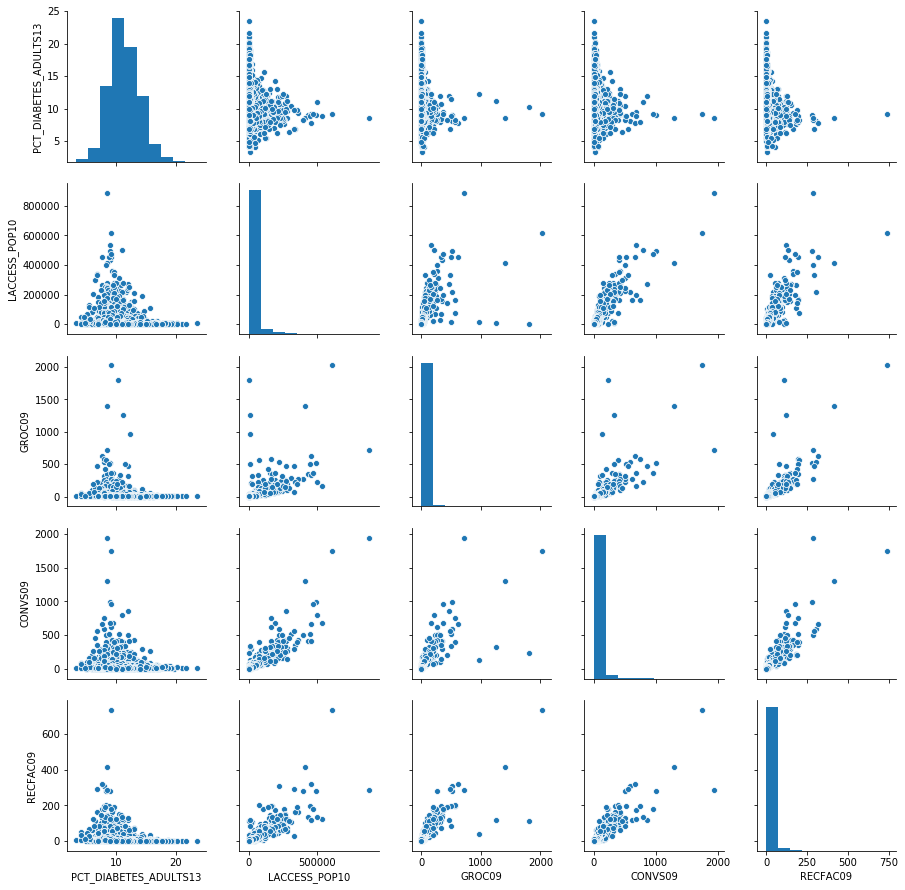

In [19]:
sns.pairplot(df[['PCT_DIABETES_ADULTS13', 'LACCESS_POP10','GROC09',
                 'CONVS09', 'RECFAC09']]);

In [20]:
# dummy variables 

In [21]:
df.dtypes

FIPS                       int64
FIPS.1                     int64
State                     object
County                    object
PCT_DIABETES_ADULTS08    float64
PCT_DIABETES_ADULTS13    float64
PCT_OBESE_ADULTS08       float64
PCT_OBESE_ADULTS13       float64
RECFAC09                   int64
LACCESS_POP10            float64
PCT_LACCESS_POP10        float64
LACCESS_LOWI10           float64
PCT_LACCESS_LOWI10       float64
LACCESS_HHNV10           float64
PCT_LACCESS_HHNV10       float64
LACCESS_CHILD10          float64
PCT_LACCESS_CHILD10      float64
LACCESS_SENIORS10        float64
PCT_LACCESS_SENIORS10    float64
GROC09                     int64
GROCPTH09                float64
SUPERC09                   int64
SUPERCPTH09              float64
CONVS09                    int64
CONVSPTH09               float64
SPECS09                    int64
SPECSPTH09               float64
SNAPS12                  float64
SNAPSPTH12               float64
WICS08                     int64
WICS12    

In [22]:
list_of_cols_to_dummy = ['State', 'County']

In [23]:
df = pd.get_dummies(df, columns = list_of_cols_to_dummy, drop_first = True)

# Modelling

## Train/Test Split

In [24]:
df.columns

Index(['FIPS', 'FIPS.1', 'PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13',
       'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13', 'RECFAC09', 'LACCESS_POP10',
       'PCT_LACCESS_POP10', 'LACCESS_LOWI10',
       ...
       'County_Yellow Medicine', 'County_Yellowstone', 'County_Yoakum',
       'County_Yolo', 'County_York', 'County_Young', 'County_Yuba',
       'County_Yuma', 'County_Zapata', 'County_Zavala'],
      dtype='object', length=1816)

In [25]:
X = df.drop(columns = ['PCT_OBESE_ADULTS13'])

In [26]:
y = df['PCT_OBESE_ADULTS13']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .33,
                                                    random_state=22)

### Random Forest  - best features

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators = 100)
    
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
features = X_train.columns

features_df = pd.DataFrame({'Features': features, 'Score': model.feature_importances_.round(4)})
features_df.sort_values('Score', inplace=True, ascending=False)


top_20_rf = features_df['Features'].head(20)

features_df[3:15]

,Features,Score
39,PCT_LOCLFARM12,0.0127
11,PCT_LACCESS_HHNV10,0.0107
21,CONVSPTH09,0.0105
25,SNAPSPTH12,0.0100
1,FIPS.1,0.0098
31,PCH_WICSPTH_08_12,0.0093
17,GROCPTH09,0.0092
0,FIPS,0.0091
38,PCT_LOCLFARM07,0.0087
29,WICSPTH08,0.0083


In [88]:
#turning them into a list
features_RF = list(features_df['Features'])

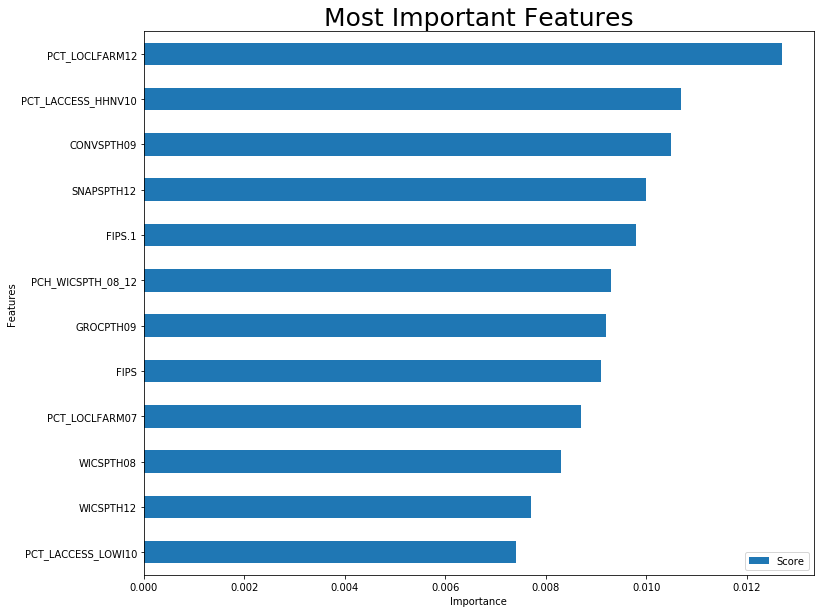

In [31]:
ax = features_df.set_index('Features')[3:15].sort_values(by = 'Score', ascending = False).plot(kind = 'barh', figsize = (12,10))
ax.set(xlabel='Importance', ylabel='Features') 
ax.invert_yaxis()
plt.title('Most Important Features', fontsize = 25);

### Regression Metrics Function

In [32]:
def regression_metrics(y,preds):
    sq_diff = (y-preds)**2 
    MSE = metrics.mean_squared_error(y,preds)
    RMSE = np.sqrt(MSE)
    print(f'This is MSE: {MSE}')
    print(f'This is RMSE: {RMSE}')


## Baseline Model

In [33]:
# baseline for a linear regression model

base_mean = DummyRegressor(strategy = 'mean')

base_mean.fit(X_train, y_train)

y_hat_base_train = base_mean.predict(X_train)
y_hat_base_test = base_mean.predict(X_test)


In [34]:
np.sqrt(mean_squared_error(y_train, y_hat_base_train))

4.520220516824114

In [35]:
np.sqrt(mean_squared_error(y_test, y_hat_base_test))

4.460824953114096

## Linear Regression with all features

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lr.score(X_train, y_train)

0.9237098969718085

In [38]:
lr.score(X_test, y_test)

-12012195097976.467

In [39]:
predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)

In [40]:
regression_metrics(y_train,predict_train)

This is MSE: 1.5587894068081027
This is RMSE: 1.248514880491259


In [41]:
regression_metrics(y_test,predict_test)

This is MSE: 237768628845703.62
This is RMSE: 15419748.014987262


A model including all the features is extremely overfit

## Linear Regression with Important features from Random Forest

In [89]:

X= df[features_RF]
y = df['PCT_OBESE_ADULTS13']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                             
                                                    random_state=42)

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
lr.score(X_train, y_train)

0.9147985727838921

In [93]:
lr.score(X_test, y_test)

0.4057687955356726

The model is still very overfit

## Linear Regression with Correlated features 

df['PCT_OBESE_ADULTS13'] varies from 11 to 47 so I would use linear regression instead of logistic regression since 
it's not bounded between zero and one

In [42]:
# features will be what is correlated to sales price after the feature engineering
correlation = df.corr()[['PCT_OBESE_ADULTS13']]
    
sorted_coefs = abs(correlation).sort_values('PCT_OBESE_ADULTS13', ascending = False)
    
strong_corr = sorted_coefs[(sorted_coefs['PCT_OBESE_ADULTS13'] > .1)]

In [43]:
strong_corr.drop(['PCT_OBESE_ADULTS13'], axis=1)

""
PCT_OBESE_ADULTS13
PCT_OBESE_ADULTS08
PCT_DIABETES_ADULTS13
PCT_DIABETES_ADULTS08
PCT_LACCESS_HHNV10
SNAPSPTH12
State_CO
PCT_LOCLFARM12
RECFAC09
FMRKT09


In [44]:
strong_corr.index

Index(['PCT_OBESE_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_DIABETES_ADULTS13',
       'PCT_DIABETES_ADULTS08', 'PCT_LACCESS_HHNV10', 'SNAPSPTH12', 'State_CO',
       'PCT_LOCLFARM12', 'RECFAC09', 'FMRKT09', 'PCT_LOCLFARM07',
       'LACCESS_SENIORS10', 'LACCESS_POP10', 'LACCESS_CHILD10', 'SPECS09',
       'GHVEG_FARMS12', 'State_CA', 'State_MS', 'GROC09', 'CONVS09',
       'GHVEG_FARMS07', 'CSA07', 'SUPERC09', 'SPECSPTH09', 'VEG_FARMS12',
       'SNAPS12', 'CONVSPTH09', 'LACCESS_LOWI10', 'State_AR', 'WICS12',
       'State_LA', 'State_AL', 'WICS08', 'State_TX', 'State_NM',
       'LACCESS_HHNV10', 'State_KY', 'PCT_LACCESS_POP10', 'PCH_WICS_08_12',
       'State_WV', 'PCT_LACCESS_SENIORS10', 'State_OK', 'State_MA', 'State_MT',
       'State_SC', 'State_UT', 'State_NY', 'PCT_LACCESS_CHILD10'],
      dtype='object')

In [45]:
strong_corr_2 = strong_corr.drop(['PCT_OBESE_ADULTS13'])

In [46]:
features = list(strong_corr_2.index)

In [47]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [48]:

X= df[features]
y = df['PCT_OBESE_ADULTS13']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                             
                                                    random_state=42)

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lr.score(X_train, y_train)

0.7482809072773318

In [52]:
lr.coef_

array([ 6.80939424e-01,  5.79326744e-01, -3.24765496e-01,  1.11788824e-02,
        1.58079202e-01, -1.93567986e+00, -7.49472234e-02, -1.68709494e-02,
        4.33345369e-02,  1.79036793e-02,  1.23556497e-05, -2.78582453e-05,
        8.08201864e-05,  1.79839905e-02,  2.47573925e-02, -2.86247146e+00,
       -1.60180209e-01, -8.87700766e-03,  2.59818894e-03, -6.39280901e-02,
       -5.34331071e-03, -2.18785036e-02, -2.63492007e-01,  1.97039795e-03,
        1.61891321e-04, -3.08942304e-01,  1.20186299e-05,  1.87271009e+00,
       -1.11686378e-03,  1.87292045e+00, -1.20468278e-02,  5.30531242e-03,
       -1.41416765e+00, -2.74922401e+00,  3.03073747e-05,  3.74268336e-02,
       -3.43665566e-02, -1.97671317e-03,  1.60634344e+00, -2.73365378e-02,
        6.87088661e-01, -3.04317384e-01, -7.06906029e-01,  1.68124254e-01,
       -1.78610392e+00, -5.77729504e-01,  1.53211645e-01])

In [53]:
lr.score(X_test, y_test)

0.7307279743788966

In [54]:
model_1 = lr.predict(X_train)

In [55]:
model_2 = lr.predict(X_test)

In [56]:
regression_metrics(y_train,model_1)

This is MSE: 5.071338416324772
This is RMSE: 2.2519632360064787


In [57]:
regression_metrics(y_test,model_2)

This is MSE: 5.51907546759965
This is RMSE: 2.349271263094079


In [58]:
lr.coef_

array([ 6.80939424e-01,  5.79326744e-01, -3.24765496e-01,  1.11788824e-02,
        1.58079202e-01, -1.93567986e+00, -7.49472234e-02, -1.68709494e-02,
        4.33345369e-02,  1.79036793e-02,  1.23556497e-05, -2.78582453e-05,
        8.08201864e-05,  1.79839905e-02,  2.47573925e-02, -2.86247146e+00,
       -1.60180209e-01, -8.87700766e-03,  2.59818894e-03, -6.39280901e-02,
       -5.34331071e-03, -2.18785036e-02, -2.63492007e-01,  1.97039795e-03,
        1.61891321e-04, -3.08942304e-01,  1.20186299e-05,  1.87271009e+00,
       -1.11686378e-03,  1.87292045e+00, -1.20468278e-02,  5.30531242e-03,
       -1.41416765e+00, -2.74922401e+00,  3.03073747e-05,  3.74268336e-02,
       -3.43665566e-02, -1.97671317e-03,  1.60634344e+00, -2.73365378e-02,
        6.87088661e-01, -3.04317384e-01, -7.06906029e-01,  1.68124254e-01,
       -1.78610392e+00, -5.77729504e-01,  1.53211645e-01])

It is slightly better than the baseline.

In [59]:
lr_df_coeff = pd.DataFrame({
    'column':features,
    'abs_coef': np.abs(lr.coef_)
})

In [60]:
lr_df_coeff.head(6)

,column,abs_coef
0,PCT_OBESE_ADULTS08,0.680939
1,PCT_DIABETES_ADULTS13,0.579327
2,PCT_DIABETES_ADULTS08,0.324765
3,PCT_LACCESS_HHNV10,0.011179
4,SNAPSPTH12,0.158079
5,State_CO,1.935680


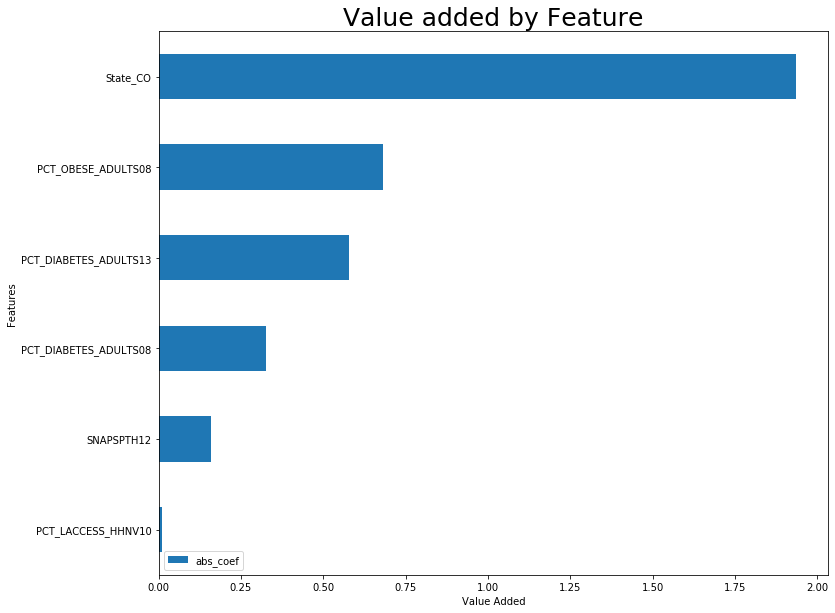

In [61]:
ax = lr_df_coeff.set_index('column').head(6).sort_values(by = 'abs_coef', ascending = False).plot(kind = 'barh', figsize = (12,10))
ax.set(xlabel='Value Added', ylabel='Features') 
ax.invert_yaxis()
plt.title('Value added by Feature', fontsize = 25);

## Regularized Linear Regression

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
#scaling to conduct ridge and lasso
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [64]:
from sklearn.linear_model import Lasso

In [65]:
from sklearn.linear_model import LassoCV

#### Scale

In [66]:
#scaling to conduct ridge and lasso
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

#### Lasso

Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

In [67]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV

In [68]:
lasso_alphas = np.logspace(-3,0,100)

lasso = LassoCV(alphas=lasso_alphas,
               cv=5, max_iter=5000)

# Cross-validate over our list of Lasso alphas.
lasso.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [69]:
lasso.score(Z_train, y_train)

0.7465377056366207

In [70]:
lasso.score(Z_test, y_test)

0.7301801050355525

In [71]:
pred_train = lasso.predict(Z_train)
pred_test = lasso.predict(Z_test)

In [72]:
lasso_df_coeff = pd.DataFrame({
    'column':features,
    'abs_coef': np.abs(lasso.coef_)
})

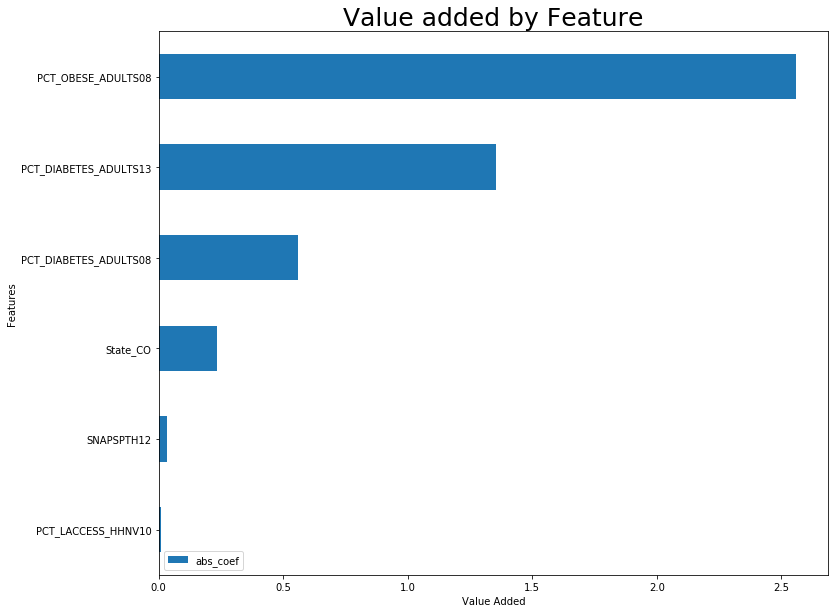

In [73]:
ax = lasso_df_coeff.set_index('column').head(6).sort_values(by = 'abs_coef', ascending = False).plot(kind = 'barh', figsize = (12,10))
ax.set(xlabel='Value Added', ylabel='Features') 
ax.invert_yaxis()
plt.title('Value added by Feature', fontsize = 25);

Lasso had the best score with train of .78 and .746

#### Ridge

 ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 

In [74]:
ridge = Ridge()
ridge.fit(Z_train, y_train)
print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))

0.7482682023488363
0.7307272511507827


In [75]:
ridge_alphas = np.logspace(0,5,100)
# then converts them to alphas between 10^0 and 10^5.
ridge_cv = RidgeCV(alphas = ridge_alphas, scoring = 'r2', cv=5)
# Cross-validate over our list of ridge alphas.

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [76]:
ridge_cv.score(Z_train, y_train)

0.7478000708832586

In [77]:
ridge_cv.score(Z_test, y_test)

0.7313049704742935

In [78]:
predict_train = ridge_cv.predict(Z_train)
predict_test = ridge_cv.predict(Z_test)

In [79]:
#regression_metrics(Z_test,predict_train)

#### PCA

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables

We decided to run the model with all features. 

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [81]:

# Instantiate our StandardScaler.
ss = StandardScaler()

# Scale X_train.
X_train = ss.fit_transform(X_train)

# Scale X_test.
X_test = ss.transform(X_test)

In [82]:

pca = PCA(n_components = 10)

# Fit PCA to training data.
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [83]:
lm = LinearRegression()
# Transform Z_train and Z_test.
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

# Fit on Z_train.
lm.fit(Z_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
print(f'Training Score: {round(lm.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(lm.score(Z_test, y_test),4)}')

Training Score: 0.6618
Testing Score: 0.6432


## Predictions

In [85]:
predictions = lasso.predict(X_train)

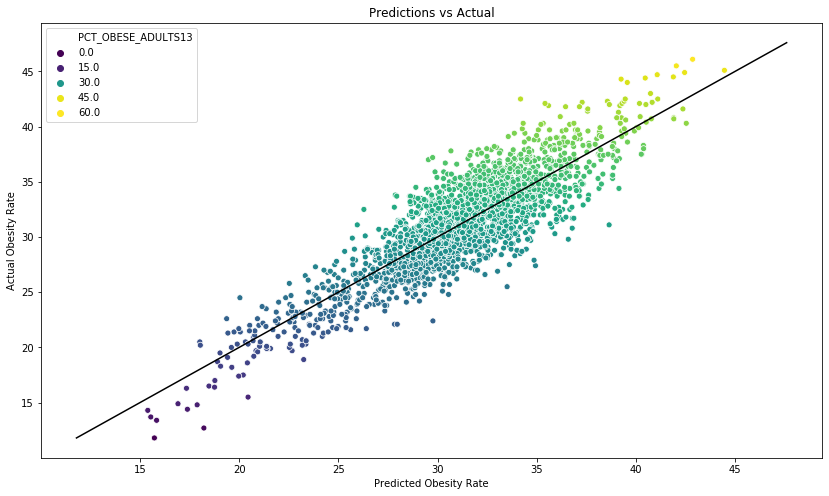

In [86]:
plt.figure(figsize=(14,8))
ax = sns.scatterplot(predictions, y_train, hue=y_train, palette='viridis', legend="brief");
ax.plot([np.min(y), np.max(y)],
         [np.min(y), np.max(y)],
         color = 'black')
ax.set(xlabel="Predicted Obesity Rate", ylabel="Actual Obesity Rate", title="Predictions vs Actual");

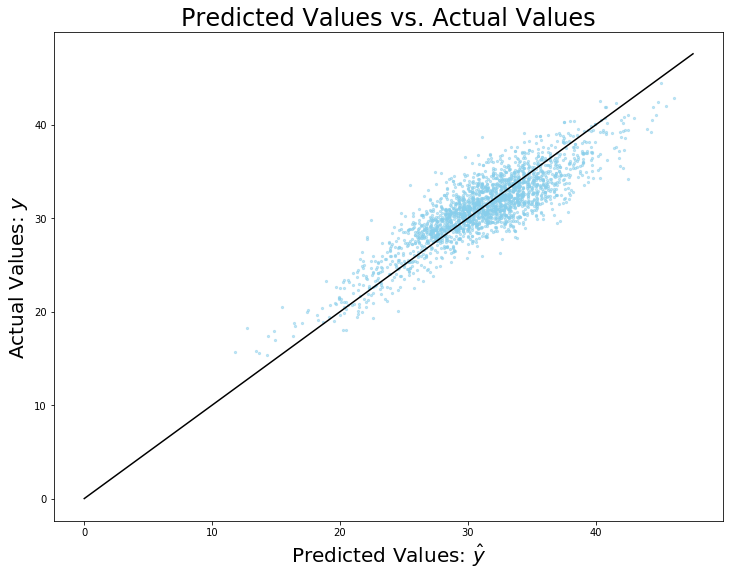

In [87]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_train, predictions, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24)
plt.show();

### Table of results


|Model                   | Train  Score    | Test score     | Misclassification |  
|------------------------|-----------------|----------------|-------------------|
| Baseline               |                 |                |                   |
| Linear Regression      |                 |                |                   | 
| Lasso                  |                 |                |                   |      
| Ridge                  |                 |                |                   |       
| PCA                    |                 |                |                   |                     

# Conclusions and Limitations

As result, even if the counties had a lot of different food options and easy access to healthier food stores, a low-income household will choose the cheapest option and ignore the health consequences. The region of the
U.S. is also very important factor that accounts for the obesity levels. Some counties had
a small number of grocery stores and access to healthy food options, and many households do not have access to a car. The lack of access to supermarkets has a greater chance of health challenges such as diabetes, heart disease and cancer. Unhealthy food may be a lot cheaper in the short run but there is significant evidence that unhealthy eating will lead to diabetes, cardiovascular disease and other life threatening diseases. The consequences in the long run are a lot worse. In order to end obesity in the U.S., we need to make the healthier food options more affordable.


- obesity is the target for part of this project, there are issues with the way that obesity is calculated. Namely, there is debate over whether or not BMI is an accurate way of measuring obesity.